<a href="https://colab.research.google.com/github/1900690/analog-meter-reading/blob/main/analog_meter_reading_webUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

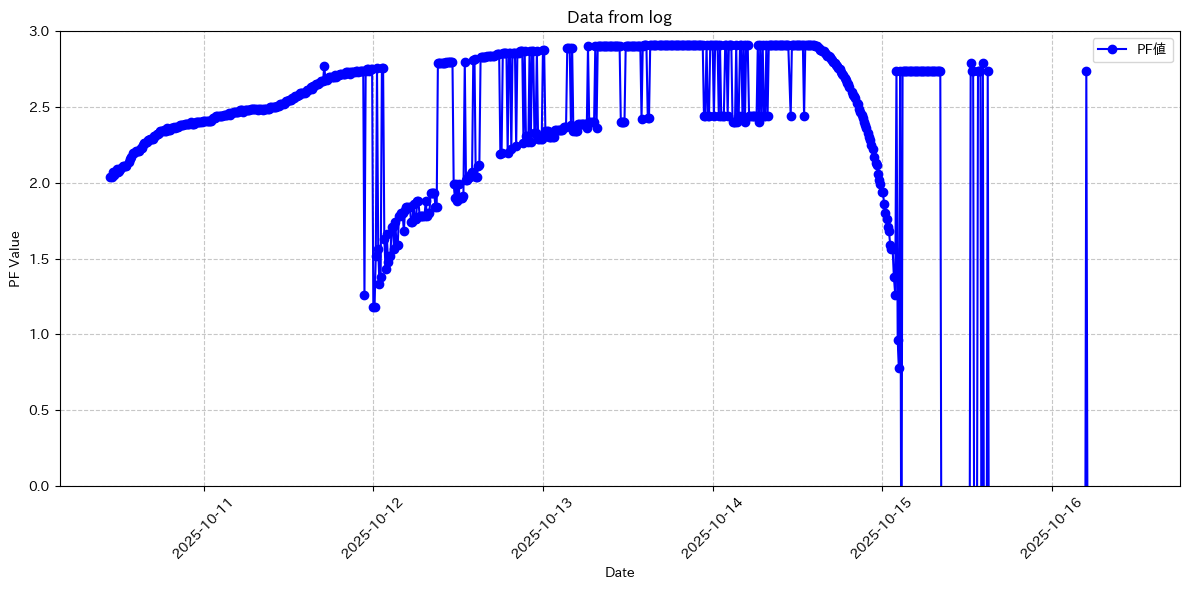

In [4]:
#@title スプレッドシート読み込み・グラフ表示ツール
#@markdown 以下の項目を入力して実行してください。

spreadsheet_url = "https://docs.google.com/spreadsheets/d/14mMxlB6O42vG6AzgwruYaRt7Er_H7JBrb5QT4BzA32Y/edit?usp=drivesdk" #@param {type:"string"}
sheet_name = "log" #@param {type:"string"}

# ライブラリのインストール（出力を完全に捨てる設定）
!pip install japanize-matplotlib > /dev/null 2>&1

import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from google.colab import auth

def main():
    if not spreadsheet_url:
        print("エラー: スプレッドシートのURLを入力してください。")
        return

    try:
        # 1. 認証とスプレッドシートへのアクセス
        auth.authenticate_user()
        creds, _ = default()
        gc = gspread.authorize(creds)

        # 2. スプレッドシートを開く
        # URLからスプレッドシートを直接開く
        sh = gc.open_by_url(spreadsheet_url)

        # 指定されたシート名のデータを取得
        try:
            worksheet = sh.worksheet(sheet_name)
        except gspread.exceptions.WorksheetNotFound:
            print(f"エラー: シート名 '{sheet_name}' が見つかりません。")
            return

        # 3. データをPandas DataFrameに変換
        data = worksheet.get_all_records()
        df = pd.DataFrame(data)

        if df.empty:
            print("エラー: シートにデータがありません。")
            return

        # 第1列（日付）と第2列（PF値）の列名を取得
        cols = df.columns
        date_col = cols[0]
        pf_col = cols[1]

        # 日付型に変換（エラーはNaTにする）
        df[date_col] = pd.to_datetime(df[date_col])
        # 数値型に変換
        df[pf_col] = pd.to_numeric(df[pf_col], errors='coerce')

        # 欠損値を除去
        df = df.dropna(subset=[date_col, pf_col])
        df = df.sort_values(by=date_col)

        # 4. グラフの描画
        plt.figure(figsize=(12, 6))
        plt.plot(df[date_col], df[pf_col], marker='o', linestyle='-', color='b', label='PF値')

        # グラフの設定
        plt.title(f'Data from {sheet_name}')
        plt.xlabel('Date')
        plt.ylabel('PF Value')

        # Y軸の範囲を0〜3に設定
        plt.ylim(0, 3)

        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.show()

    except Exception as e:
        print(f"エラーが発生しました: {e}")

if __name__ == "__main__":
    main()